In [1]:
#!/usr/bin/env python
#SBATCH --job-name=SNNBase
#SBATCH --error=%x.%j.err
#SBATCH --mail-user=hzhao@teco.edu
#SBATCH --export=ALL
#SBATCH --time=48:00:00
#SBATCH --partition=sdil
#SBATCH --gres=gpu:1

import torch
import os
from pprint import pprint
import math
import sys
from pathlib import Path
sys.path.append(os.getcwd())
sys.path.append(str(Path(os.getcwd()).parent))
import training as T
import snntorch as snn
import matplotlib.pyplot as plt

In [6]:
seed = 0
ds_idx = 0

In [7]:
datasets = os.listdir('../ts_datasets/')
datasets = [dataset for dataset in datasets if dataset.endswith('.tsds')]
datasets.sort()

dataset = datasets[ds_idx]
package = torch.load(f'../ts_datasets/{dataset}')

name = package['name']

N_train = package['N_train']
N_valid = package['N_valid']
N_test = package['N_test']

N_class = package['N_class']

N_channel = package['N_channel']
N_length = package['N_length']

N_feature = N_channel * N_length

print(f'dataset: {name}, N_train: {N_train}, N_valid: {N_valid}, N_test: {N_test}, N_class: {N_class}, N_feature: {N_feature}, N_channel: {N_channel}, N_length: {N_length}')

X_train = package['X_train']
X_valid = package['X_valid']
X_test = package['X_test']

y_train = package['Y_train']
y_valid = package['Y_valid']
y_test = package['Y_test']

dataset: ArrowHead, N_train: 126, N_valid: 42, N_test: 43, N_class: 3, N_feature: 251, N_channel: 1, N_length: 251


# Single Spiking Neuron + Constant

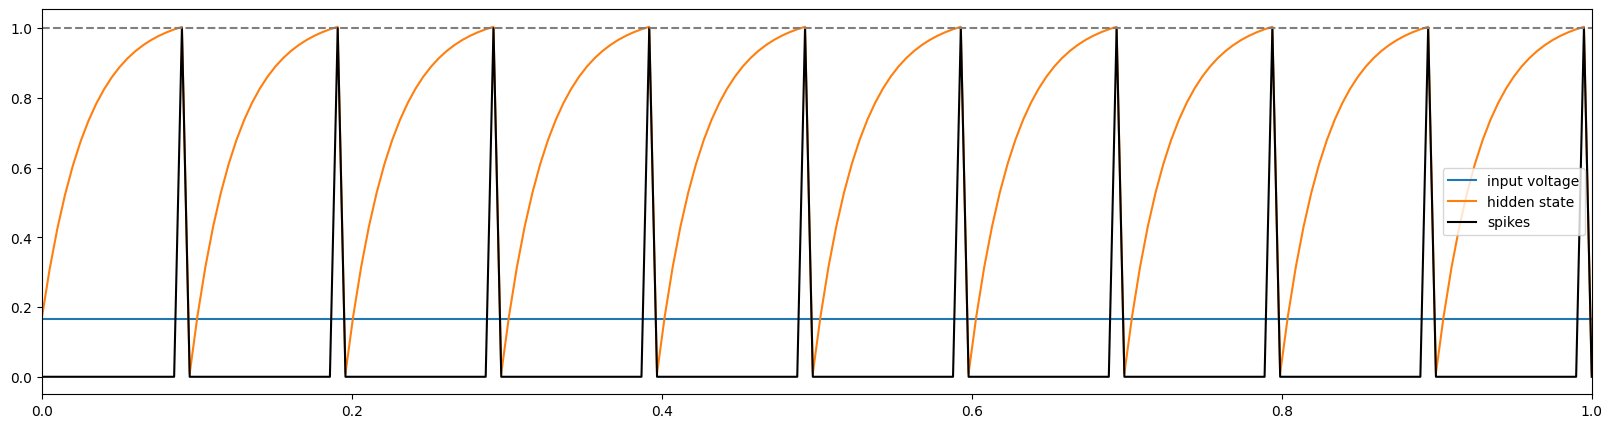

In [20]:
N_length = 200
time = torch.linspace(0,1,N_length)
threshold = 1 # first optimizable parameter


SN = snn.Leaky(beta=0.84, init_hidden=True, output=True, threshold=threshold) # second optimizable parameter

X_vis = torch.ones(N_length) / 6

mems = []
outs = []
for t in range(N_length):
    out, mem = SN(X_vis[t])
    outs.append(out.detach())
    mems.append(mem.detach())

plt.figure(figsize=[20,5])
plt.plot(time,X_vis, label='input voltage')
plt.xlim([0,1])

plt.plot(time, mems, label='hidden state')
plt.xlim([0,1])
# plt.ylim([0,threshold*1.2])

plt.plot(time, outs, c='black', label='spikes')
plt.xlim([0,1])

plt.plot(time, time*0+threshold, '--', c='gray')

plt.legend()
plt.savefig(f'./ffp/B3.pdf', format='pdf', bbox_inches='tight')

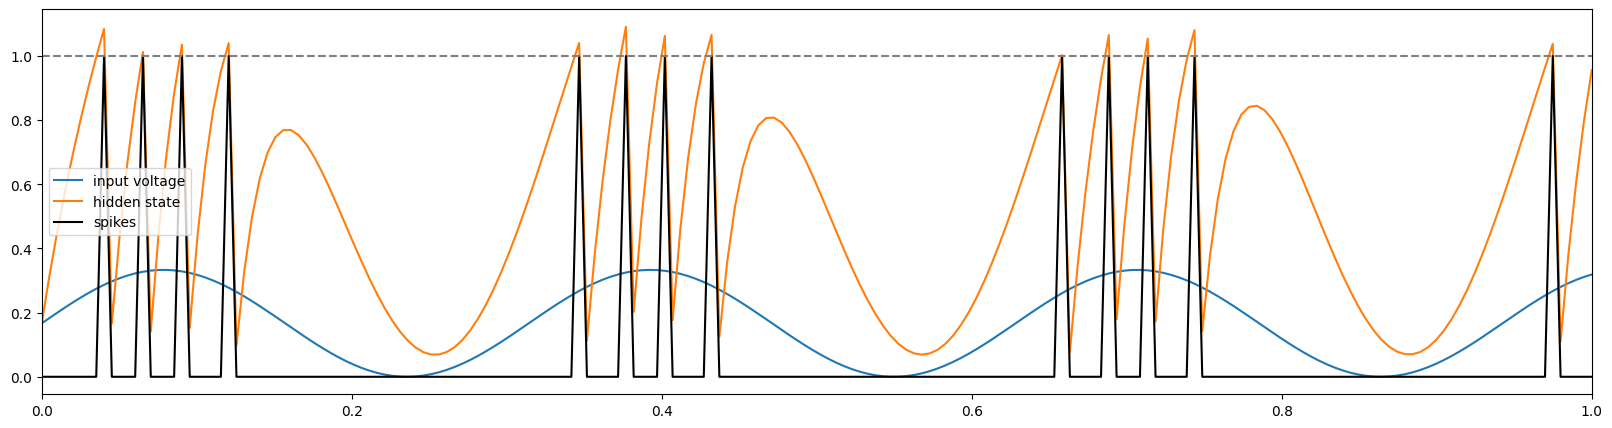

In [26]:
N_length = 200
time = torch.linspace(0,1,N_length)
threshold = 1


SN = snn.Leaky(beta=0.8, init_hidden=True, output=True, threshold=threshold)

X_vis = torch.sin(time*20) / 6 + 1/6

mems = []
outs = []
for t in range(N_length):
    out, mem = SN(X_vis[t])
    outs.append(out.detach())
    mems.append(mem.detach())

plt.figure(figsize=[20,5])
plt.plot(time,X_vis, label='input voltage')
plt.xlim([0,1])

plt.plot(time, mems, label='hidden state')
plt.xlim([0,1])

plt.plot(time, outs, c='black', label='spikes')
plt.xlim([0,1])

plt.plot(time, time*0+threshold, '--', c='gray')

plt.legend()

plt.savefig(f'./ffp/D3.pdf', format='pdf', bbox_inches='tight')

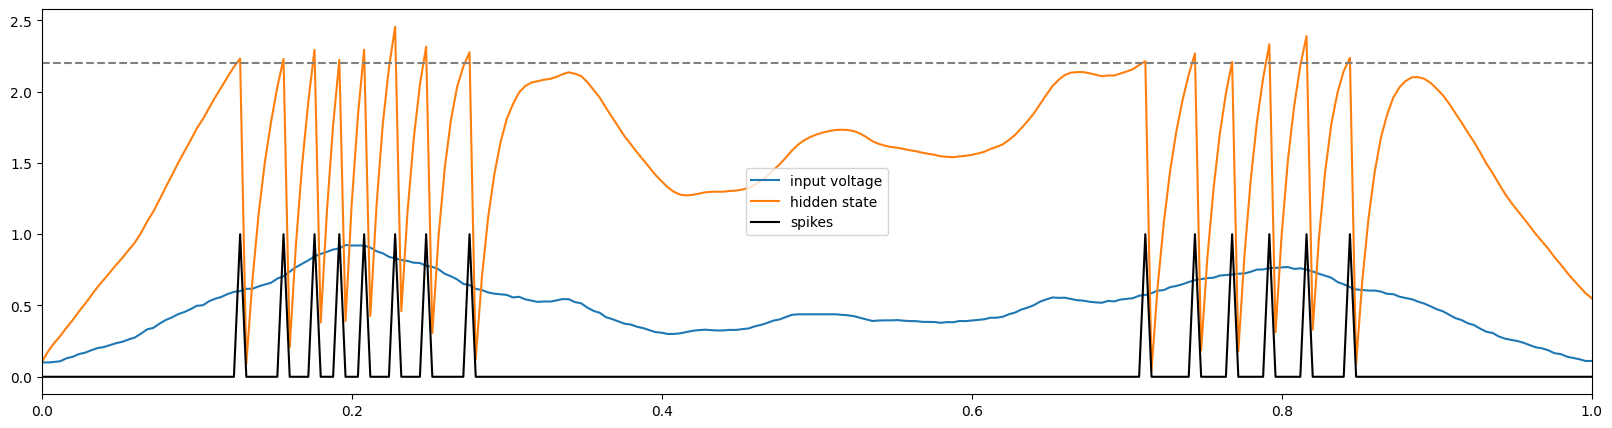

In [27]:
N_length = X_train.shape[-1]
time = torch.linspace(0,1,N_length)
threshold = 2.2

SN = snn.Leaky(beta=0.75,init_hidden=True, output=True, threshold=threshold)

X_vis = X_train[0,0,:]

mems = []
outs = []
for t in range(N_length):
    out, mem = SN(X_vis[t])
    outs.append(out.detach())
    mems.append(mem.detach())

plt.figure(figsize=[20,5])
plt.plot(time,X_vis, label='input voltage')
plt.xlim([0,1])

plt.plot(time, mems, label='hidden state')
plt.xlim([0,1])

plt.plot(time, outs, c='black', label='spikes')
plt.xlim([0,1])

plt.plot(time, time*0+threshold, '--', c='gray')

plt.legend()

plt.savefig(f'./ffp/E1.pdf', format='pdf', bbox_inches='tight')

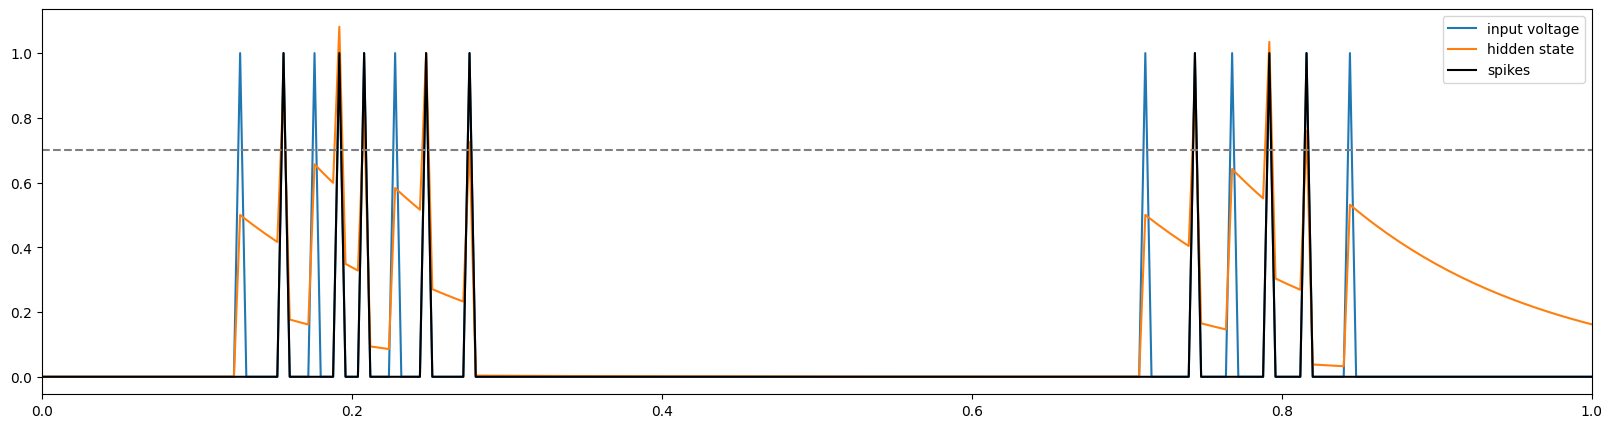

In [28]:
N_length = X_train.shape[-1]
time = torch.linspace(0,1,N_length)
threshold = 0.7


SN = snn.Leaky(beta=0.97, init_hidden=True, output=True, threshold=threshold)

X_vis = X_train[0,0,:]

mems_2 = []
outs_2 = []
for t in range(N_length):
    out_2, mem_2 = SN(outs[t]/2)
    outs_2.append(out_2.detach())
    mems_2.append(mem_2.detach())

plt.figure(figsize=[20,5])
plt.plot(time, outs, label='input voltage')
plt.xlim([0,1])

plt.plot(time, mems_2, label='hidden state')
plt.xlim([0,1])

plt.plot(time, outs_2, c='black', label='spikes')
plt.xlim([0,1])

plt.plot(time, time*0+threshold, '--', c='gray')

plt.legend()

plt.savefig(f'./ffp/E2.pdf', format='pdf', bbox_inches='tight')

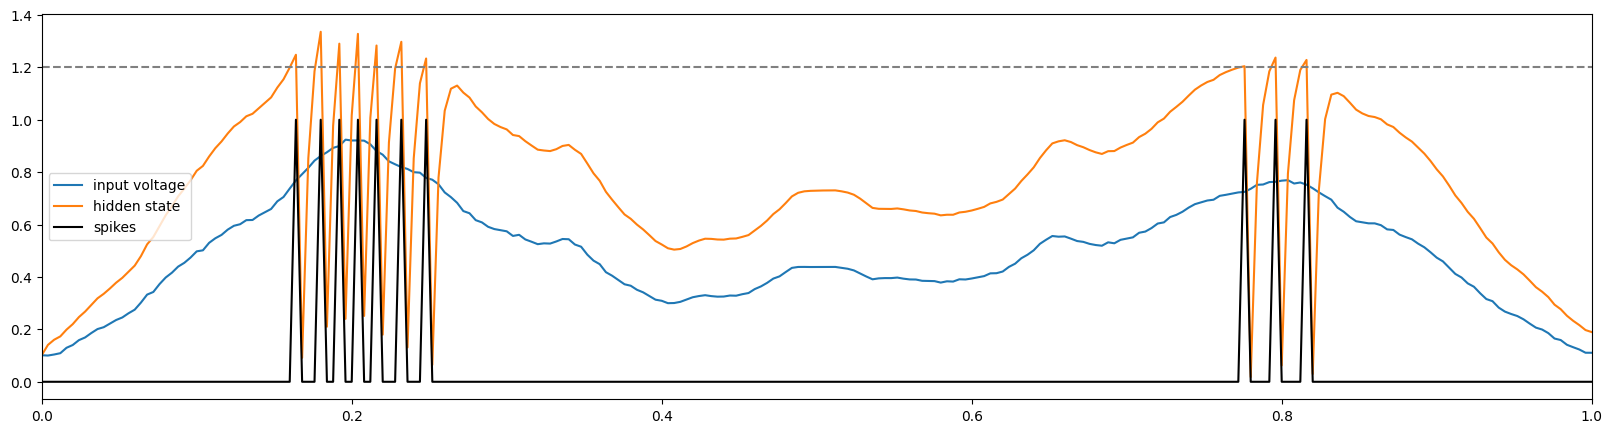

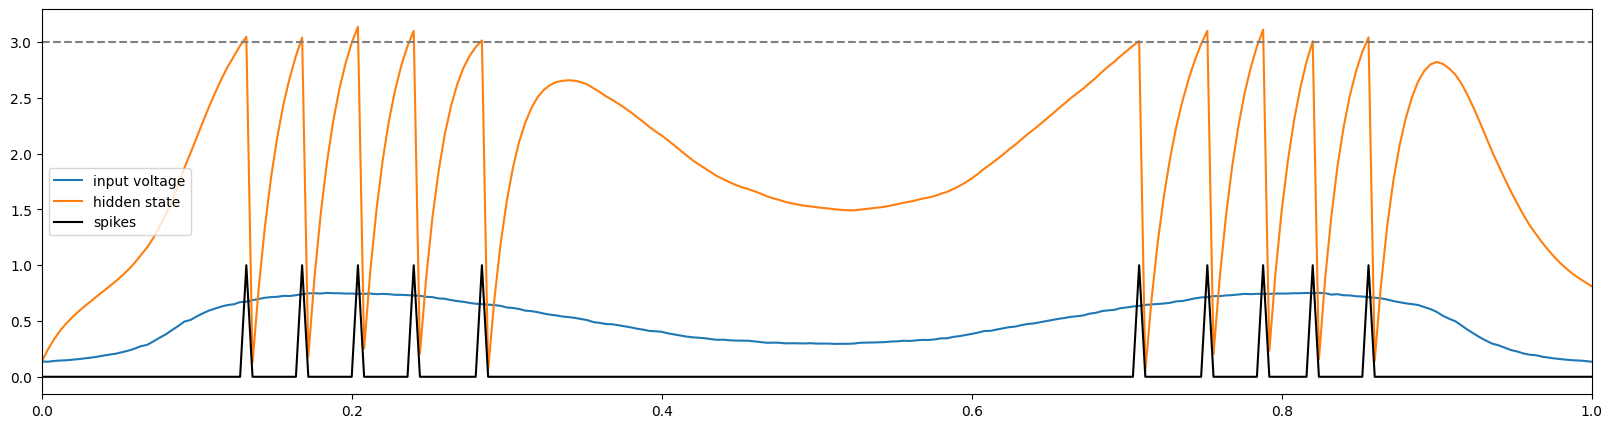

In [29]:
N_length = X_train.shape[-1]
time = torch.linspace(0,1,N_length)
threshold1 = 1.2
threshold2 = 3


X_vis1 = X_train[0,0,:]
X_vis2 = X_train[2,0,:]

SN1  = snn.Leaky(beta=0.4, init_hidden=True, output=True, threshold=threshold1)
SN2  = snn.Leaky(beta=0.8,  init_hidden=True, output=True, threshold=threshold2)


mems_1 = []
outs_1 = []
mems_2 = []
outs_2 = []


for t in range(N_length):
    out_1, mem_1 = SN1(X_vis1[t])
    out_2, mem_2 = SN2(X_vis2[t])
    outs_1.append(out_1.detach().item())
    mems_1.append(mem_1.detach().item())
    outs_2.append(out_2.detach().item())
    mems_2.append(mem_2.detach().item())

plt.figure(figsize=[20,5])
plt.plot(time, X_vis1, label='input voltage')
plt.xlim([0,1])

plt.plot(time, mems_1, label='hidden state')
plt.xlim([0,1])

plt.plot(time, outs_1, c='black', label='spikes')
plt.xlim([0,1])

plt.plot(time, time*0+threshold1, '--', c='gray')

plt.legend()
plt.savefig(f'./ffp/F1.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=[20,5])
plt.plot(time, X_vis2, label='input voltage')
plt.xlim([0,1])

plt.plot(time, mems_2, label='hidden state')
plt.xlim([0,1])

plt.plot(time, outs_2, c='black', label='spikes')
plt.xlim([0,1])

plt.plot(time, time*0+threshold2, '--', c='gray')

plt.legend()
plt.savefig(f'./ffp/F2.pdf', format='pdf', bbox_inches='tight')


torch.Size([251, 1])


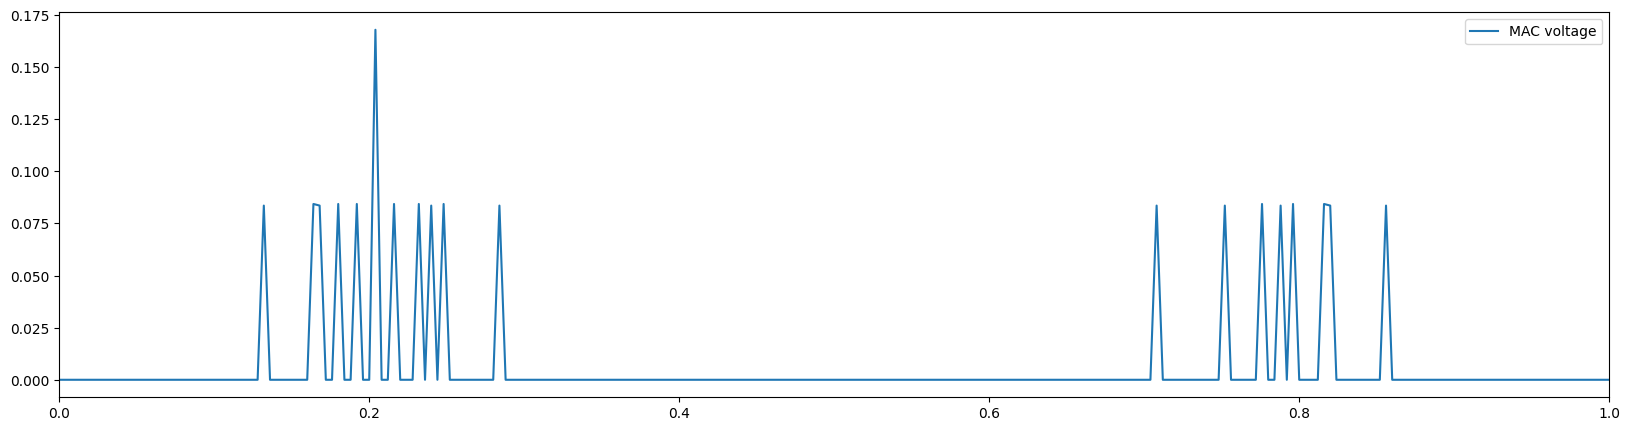

In [31]:
s1 = torch.tensor(outs_1).view(-1,1)
s2 = torch.tensor(outs_2).view(-1,1)
S = torch.cat([s1,s2], dim=1)

torch.manual_seed(4)
MAC = torch.nn.Linear(2,1, bias=False)

S_MAC = MAC(S)
print(S_MAC.shape)

plt.figure(figsize=[20,5])
plt.plot(time, S_MAC.detach().numpy(), label='MAC voltage')
plt.legend()
plt.xlim([0,1])
plt.savefig(f'./ffp/F3.pdf', format='pdf', bbox_inches='tight')

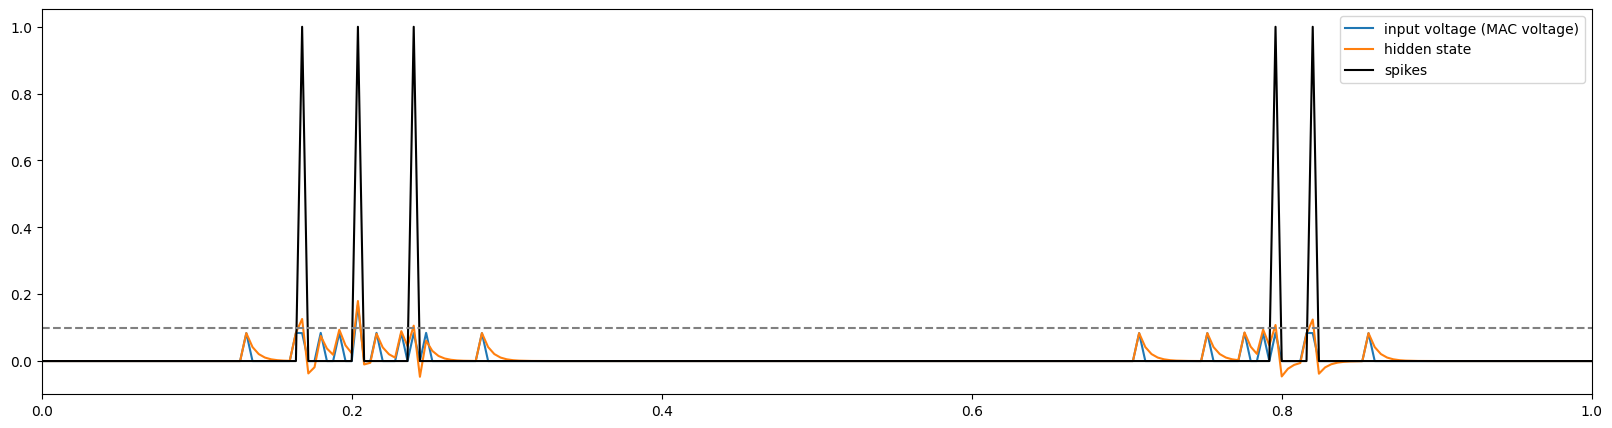

In [32]:
threshold3 = 0.1
SN3  = snn.Leaky(beta=0.5,  init_hidden=True, output=True, threshold=threshold3)

mems_3 = []
outs_3 = []
for t in range(N_length):
    out_3, mem_3 = SN3(S_MAC[t])
    outs_3.append(out_3.detach().item())
    mems_3.append(mem_3.detach().item())


plt.figure(figsize=[20,5])
plt.plot(time, S_MAC.detach().numpy(), label='input voltage (MAC voltage)')
plt.xlim([0,1])

plt.plot(time, mems_3, label='hidden state')
plt.xlim([0,1])

plt.plot(time, outs_3, c='black', label='spikes')
plt.xlim([0,1])

plt.plot(time, time*0+threshold3, '--', c='gray')

plt.legend()
plt.savefig(f'./ffp/F4.pdf', format='pdf', bbox_inches='tight')

In [23]:
s2.shape

torch.Size([251, 1])